In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#paths to all three datasets
path1 = 'part-00092-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
path2 = 'part-00037-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
path3 = 'part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'

#loading datasets into DataFrames Tables
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

#merging the DataFrames
data = pd.concat([df1, df2, df3], ignore_index=True)

#to view the top 5 rows of the DataFrames
data.head(10)



,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.0,6.00,64.00,8.216014,8.216014,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333093e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
1,0.000000,0.0,1.00,64.00,1.273160,1.273160,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.348239e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.197337,234065.0,17.00,64.00,2139.548403,2139.548403,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.376294e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
3,0.107838,30854.5,17.00,64.00,11434.330849,11434.330849,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310663e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,4.636251,108.0,6.00,64.00,0.431384,0.431384,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298534e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
5,0.230183,12179.0,17.00,64.00,1432.995199,1432.995199,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.309892e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
6,0.037000,22653.0,17.00,64.00,13863.373048,13863.373048,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.312361e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
7,0.000000,0.0,1.00,64.00,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312882e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
8,59.943630,734901.0,9.30,185.10,29.281833,29.281833,0.0,0.0,0.0,0.0,...,821.535948,148.30,1.665179e+08,13.5,31.921579,1163.895622,681026.259706,1.00,244.60,BenignTraffic
9,0.000000,0.0,0.99,63.36,282.325890,282.325890,0.0,0.0,0.0,0.0,...,549.332690,934.98,8.324996e+07,9.5,43.136308,776.819634,317833.398560,0.95,141.55,DDoS-ICMP_Fragmentation


In [2]:
#dataset size
print(f"Dataset Size: {data.shape} (Rows, Columns)")

Dataset Size: (642635, 47) (Rows, Columns)


In [3]:
#column names
data.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

----------------------The dataset contains a total of 47 columns. Description of each columns are as follows:---------------------

flow_duration: Duration of the network flow in seconds.

Header_Length: Length of the packet headers in bytes.

Protocol Type: Numerical identifier of the network protocol used.

Duration: Time duration of the connection.

Rate: Transmission rate of the flow.

Srate: Source transmission rate.

Drate: Destination transmission rate.

fin_flag_number: Count of TCP FIN flags in the session.

syn_flag_number: Count of TCP SYN flags in the session.

rst_flag_number: Count of TCP RST flags in the session.

psh_flag_number: Count of TCP PSH flags in the session.

ack_flag_number: Count of TCP ACK flags in the session.

ece_flag_number: Count of TCP ECE flags in the session.

cwr_flag_number: Count of TCP CWR flags in the session.

ack_count: Total count of acknowledgments.

syn_count: Total count of synchronizations.

fin_count: Total count of finalizations.

urg_count: Total count of urgencies.

rst_count: Total count of resets.

HTTP: Presence indicator for HTTP protocol.

HTTPS: Presence indicator for HTTPS protocol.

DNS: Presence indicator for DNS protocol.

Telnet: Presence indicator for Telnet protocol.

SMTP: Presence indicator for SMTP protocol.

SSH: Presence indicator for SSH protocol.

IRC: Presence indicator for IRC protocol.

TCP: Presence indicator for TCP protocol.

UDP: Presence indicator for UDP protocol.

DHCP: Presence indicator for DHCP protocol.

ARP: Presence indicator for ARP protocol.

ICMP: Presence indicator for ICMP protocol.

IPv: Presence indicator for IPv protocol.

LLC: Presence indicator for LLC protocol.

Tot sum: Sum of all packet sizes.

Min: Minimum packet size.

Max: Maximum packet size.

AVG: Average packet size.

Std: Standard deviation of packet sizes.

Tot size: Total size of all packets.

IAT: Inter-arrival time of packets.

Number: Numerical identifier.

Magnitue: Related to signal or error measurement.

Radius: Range from a central point or value used in distribution calculations.

Covariance: Covariance of measurements.

Variance: Variance of measurements.

Weight: Weighting factor or importance measure.

label: Indicates the type of network traffic or attack.

In [4]:
#checking data type of each columns
print("Data Types of Each Column:")
print(data.dtypes) #all of them are float but the last one is obj

Data Types of Each Column:
flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP               float64
HTTPS              float64
DNS                float64
Telnet             float64
SMTP               float64
SSH                float64
IRC                float64
TCP                float64
UDP                float64
DHCP               float64
ARP                float64
ICMP               float64
IPv                float64
LLC                float64
Tot sum            float64
Min                float64
Max                float64
A

In [5]:
#number of unique values for each column
unique_counts = data.nunique()
print('Unique values in each columns:',unique_counts)

Unique values in each columns: flow_duration      293322
Header_Length      127251
Protocol Type        2476
Duration             5729
Rate               560114
Srate              560114
Drate                  43
fin_flag_number         2
syn_flag_number         2
rst_flag_number         2
psh_flag_number         2
ack_flag_number         2
ece_flag_number         2
cwr_flag_number         2
ack_count             223
syn_count             611
fin_count             369
urg_count            6863
rst_count           16055
HTTP                    2
HTTPS                   2
DNS                     2
Telnet                  1
SMTP                    1
SSH                     2
IRC                     1
TCP                     2
UDP                     2
DHCP                    2
ARP                     2
ICMP                    2
IPv                     2
LLC                     2
Tot sum             63311
Min                 20929
Max                 24653
AVG                111781
Std    

In [6]:
#number of missing values per column
missing_values_count = data.isnull().sum()
print("Missing Values in Each Column:",missing_values_count) #no missing values

Missing Values in Each Column: flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
lab

In [7]:
#number of duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}") #no dups

Number of Duplicate Rows: 0


In [8]:
#summary statistics of numerical features
summary_statistics = data.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x) #to show only 3 decimal value and to see full value which is very small.
print('Summary Statistics for Numerical Features:')
summary_statistics

#1. flow_duration, Header_Length, Rate, and Srate's maximum values are extremely high compared to their means, the presence of outliers or highly skewed distributions.
#2. The minimum values for many features are 0, needs further investigation
#3. The standard deviation is relatively high compared to their means, suggesting skewed distributions.


Summary Statistics for Numerical Features:


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,...,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000,642635.000
mean,5.756,75532.666,9.075,66.346,9080.846,9080.846,0.000,0.086,0.208,0.090,...,124.865,33.439,124.919,83141948.802,9.496,13.127,47.258,30848.519,0.096,141.460
std,287.269,455023.609,8.983,13.973,100157.485,100157.485,0.001,0.281,0.406,0.286,...,241.413,160.447,242.431,17019278.897,0.818,8.641,226.928,304053.106,0.233,21.037
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,42.000,0.000,42.000,0.000,1.000,9.165,0.000,0.000,0.000,1.000
25%,0.000,54.000,6.000,64.000,2.090,2.090,0.000,0.000,0.000,0.000,...,50.000,0.000,50.000,83071568.195,9.500,10.000,0.000,0.000,0.000,141.550
50%,0.000,54.000,6.000,64.000,15.647,15.647,0.000,0.000,0.000,0.000,...,54.000,0.000,54.000,83124523.250,9.500,10.392,0.000,0.000,0.000,141.550
75%,0.105,253.540,14.220,64.000,115.954,115.954,0.000,0.000,0.000,0.000,...,54.050,0.372,54.060,83343901.642,9.500,10.397,0.506,1.344,0.080,141.550
max,74586.778,9778961.000,47.000,255.000,8388608.000,8388608.000,0.328,1.000,1.000,1.000,...,7482.749,5800.142,7883.600,167639428.288,15.000,122.188,8203.969,33803599.895,1.000,244.600


In [9]:
#summary statistics for categorical features
categorical_statistics = data.describe(include=['object'])
print("Summary Statistics for Categorical Features:")
categorical_statistics

Summary Statistics for Categorical Features:


,label
count,642635
unique,34
top,DDoS-ICMP_Flood
freq,99445


In [10]:
#the occurrences of each 34 attack type in the 'label' column
label_distribution = data['label'].value_counts()
label_distribution
#1. DDos (ICMP, UDP most common), 2. Dos, 3. Mirai  

label
DDoS-ICMP_Flood            99445
DDoS-UDP_Flood             74522
DDoS-TCP_Flood             61442
DDoS-PSHACK_Flood          56258
DDoS-SYN_Flood             56159
DDoS-RSTFINFlood           55455
DDoS-SynonymousIP_Flood    49674
DoS-UDP_Flood              45374
DoS-TCP_Flood              37006
DoS-SYN_Flood              28028
BenignTraffic              15118
Mirai-greeth_flood         13702
Mirai-udpplain             11934
Mirai-greip_flood          10655
DDoS-ICMP_Fragmentation     6294
MITM-ArpSpoofing            4291
DDoS-UDP_Fragmentation      3958
DDoS-ACK_Fragmentation      3889
DNS_Spoofing                2396
Recon-HostDiscovery         1792
Recon-OSScan                1314
Recon-PortScan              1166
DoS-HTTP_Flood              1035
VulnerabilityScan            541
DDoS-HTTP_Flood              348
DDoS-SlowLoris               310
DictionaryBruteForce         178
BrowserHijacking              75
SqlInjection                  69
CommandInjection              69
Back

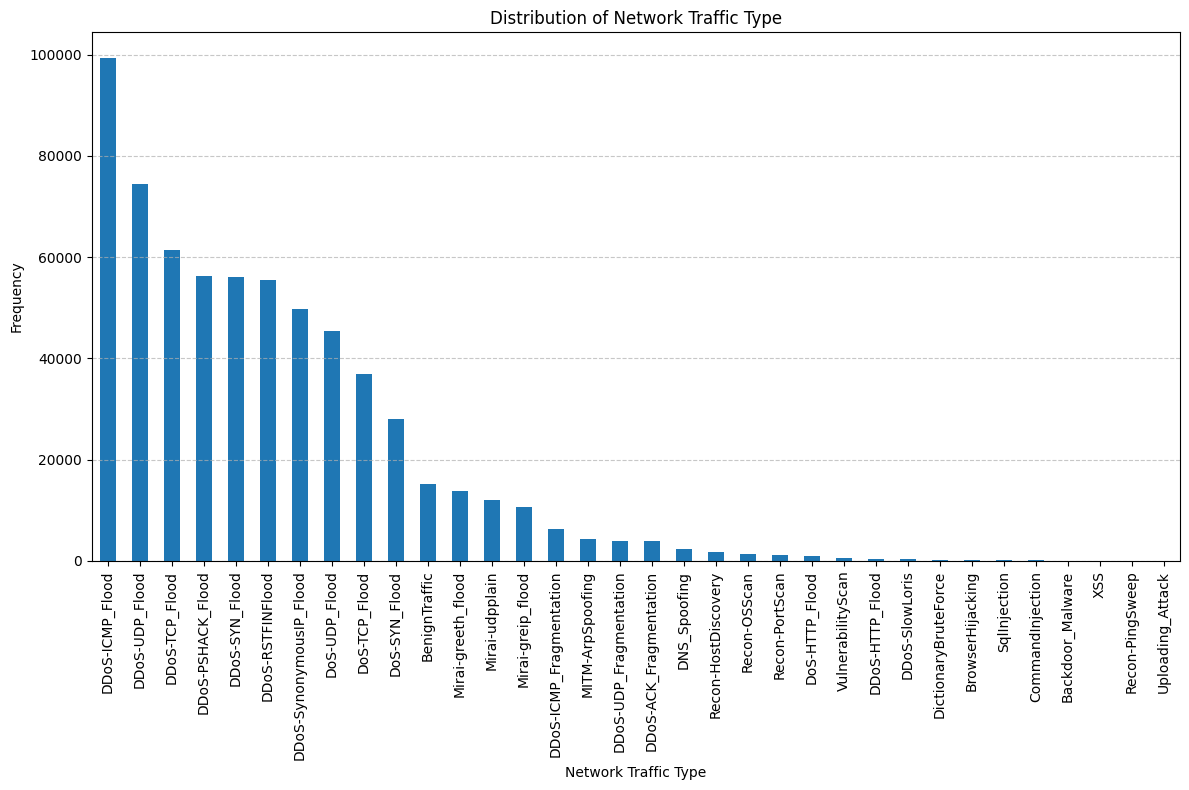

In [11]:
#plotting the distribution of Network Attack Type
plt.figure(figsize=(12, 8)) #size of the graph, widthxlength
label_distribution.plot(kind='bar') #bar graph
plt.title('Distribution of Network Traffic Type')
plt.xlabel('Network Traffic Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#1. DDos (ICMP, UDP most common), 2. Dos, 3. Mirai  

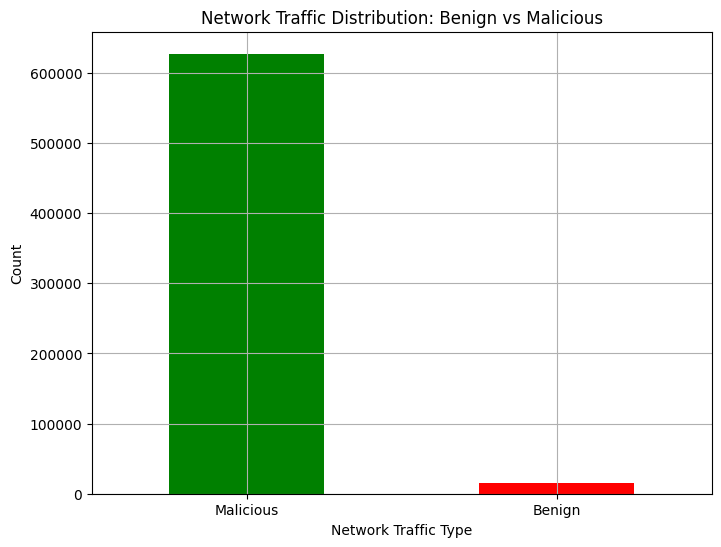

Network Traffic Distribution of  Benign & Malicious


label
Malicious    627517
Benign        15118
Name: count, dtype: int64

In [12]:
#categorizing traffic into 'Benign' and 'Malicious'
traffic_types = data['label'].apply(lambda x: 'Benign' if 'Benign' in x else 'Malicious')

#for counting the occurrences of each category
traffic_distribution = traffic_types.value_counts()

#the distribution of Network Traffic
plt.figure(figsize=(8, 6))
traffic_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Network Traffic Distribution: Benign vs Malicious')
plt.xlabel('Network Traffic Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show() 
print ('Network Traffic Distribution of  Benign & Malicious')
traffic_distribution


In [13]:
#selected random key columns to summarize
key_columns = ['flow_duration', 'Rate', 'Header_Length']

#grouping data by 'label' and calculating the mean, median, and standard deviation 
grouped_data = data.groupby('label')[key_columns].agg(['mean', 'median', 'std']).round(2)
grouped_data

#1. DDoS and DoS attacks show shorter flow durations and higher rates, which reflect their nature to overwhelm systems quickly.
#2. Benign traffic has more variability and generally less extreme values, indicating regular usage patterns.
#3. Protocol-specific attacks (like DNS Spoofing) have characteristics that may align with their operational goals, 
    #such as longer durations for DNS attacks possibly indicating manipulation efforts.


flow_duration                       Rate            \
                                 mean  median      std      mean    median   
label                                                                        
Backdoor_Malware              457.150 182.790  488.160   209.040     4.260   
BenignTraffic                  38.900  26.200   53.230  2004.970    51.900   
BrowserHijacking              104.860  18.560  188.690   105.780    32.640   
CommandInjection              184.110  51.120  272.770   349.170    32.680   
DDoS-ACK_Fragmentation          0.690   0.000   20.010 12056.560     8.050   
DDoS-HTTP_Flood                12.040   6.440   38.260 11400.600     2.600   
DDoS-ICMP_Flood                 0.030   0.000    1.280 10960.130    10.290   
DDoS-ICMP_Fragmentation         0.360   0.000    5.110 14461.020    15.880   
DDoS-PSHACK_Flood               0.110   0.000    0.900  5881.970     4.670   
DDoS-RSTFINFlood                0.070   0.000    0.840 10150.520     6.890   
DDoS-SYN_Flood                  0.570   0.000   67.430  3460.030    10.480   
DDoS-SlowLoris                 21.920  12.450   24.730 16145.830    66.560   
DDoS-SynonymousIP_Flood         2.150   0.730  154.430  2672.700     1.730   
DDoS-TCP_Flood                  0.380   0.000   39.040  6993.200    13.340   
DDoS-UDP_Flood                  0.220   0.090   11.930 17941.810  7496.870   
DDoS-UDP_Fragmentation          1.390   0.690   10.600  2177.440   320.160   
DNS_Spoofing                  405.630  19.430 3075.330  1607.450    51.420   
DictionaryBruteForce         1154.540  48.360 7171.530    47.640    26.480   
DoS-HTTP_Flood                  8.740   3.540   53.870  5091.060     6.640   
DoS-SYN_Flood                   3.080   0.250    7.370  4069.990     1.850   
DoS-TCP_Flood                   2.660   0.010   11.420  6977.380     1.610   
DoS-UDP_Flood                   0.390   0.030    7.130 19240.670 10431.780   
MITM-ArpSpoofing               44.610   5.990  148.450  2535.880   171.590   
Mirai-greeth_flood              0.050   0.000    0.660 12881.160    10.010   
Mirai-greip_flood               0.620   0.000   27.640  8183.860    10.790   
Mirai-udpplain                  2.630   1.970    8.050  2801.910  1345.590   
Recon-HostDiscovery           141.040  15.780  243.880  1573.640    17.260   
Recon-OSScan                  434.110  19.720 3204.000  1733.360    31.290   
Recon-PingSweep               559.820  13.220 1083.730    37.540    29.620   
Recon-PortScan                215.840  15.600 2027.530  3112.780    32.820   
SqlInjection                  458.260 193.670  625.020    32.910    15.020   
Uploading_Attack              178.580  99.230  205.870    45.860    17.230   
VulnerabilityScan             182.360 115.190  372.840  1917.710    23.440   
XSS                           281.780 117.510  358.240  1223.280     7.020   

                                   Header_Length                          
                               std          mean      median         std  
label                                                                     
Backdoor_Malware          1252.030     75910.560   12145.800  155779.790  
BenignTraffic            23738.740    992622.280  499537.200 1312225.340  
BrowserHijacking           207.970    199996.130   25988.100  451745.870  
CommandInjection           963.190    760850.010   15282.800 1832106.560  
DDoS-ACK_Fragmentation  103687.770      8315.540     743.920  127825.700  
DDoS-HTTP_Flood          82875.820      7587.150     752.480   57631.550  
DDoS-ICMP_Flood         137612.610       649.580       0.000   42132.570  
DDoS-ICMP_Fragmentation 118257.310      4489.920       6.760   66639.260  
DDoS-PSHACK_Flood        84230.820       446.990      54.000   33164.830  
DDoS-RSTFINFlood        107549.160       854.640      54.000   25652.000  
DDoS-SYN_Flood           87240.460       401.110      54.000   23176.390  
DDoS-SlowLoris           68632.670    189452.410   36540.480  326516.430  
DDoS-Synonym

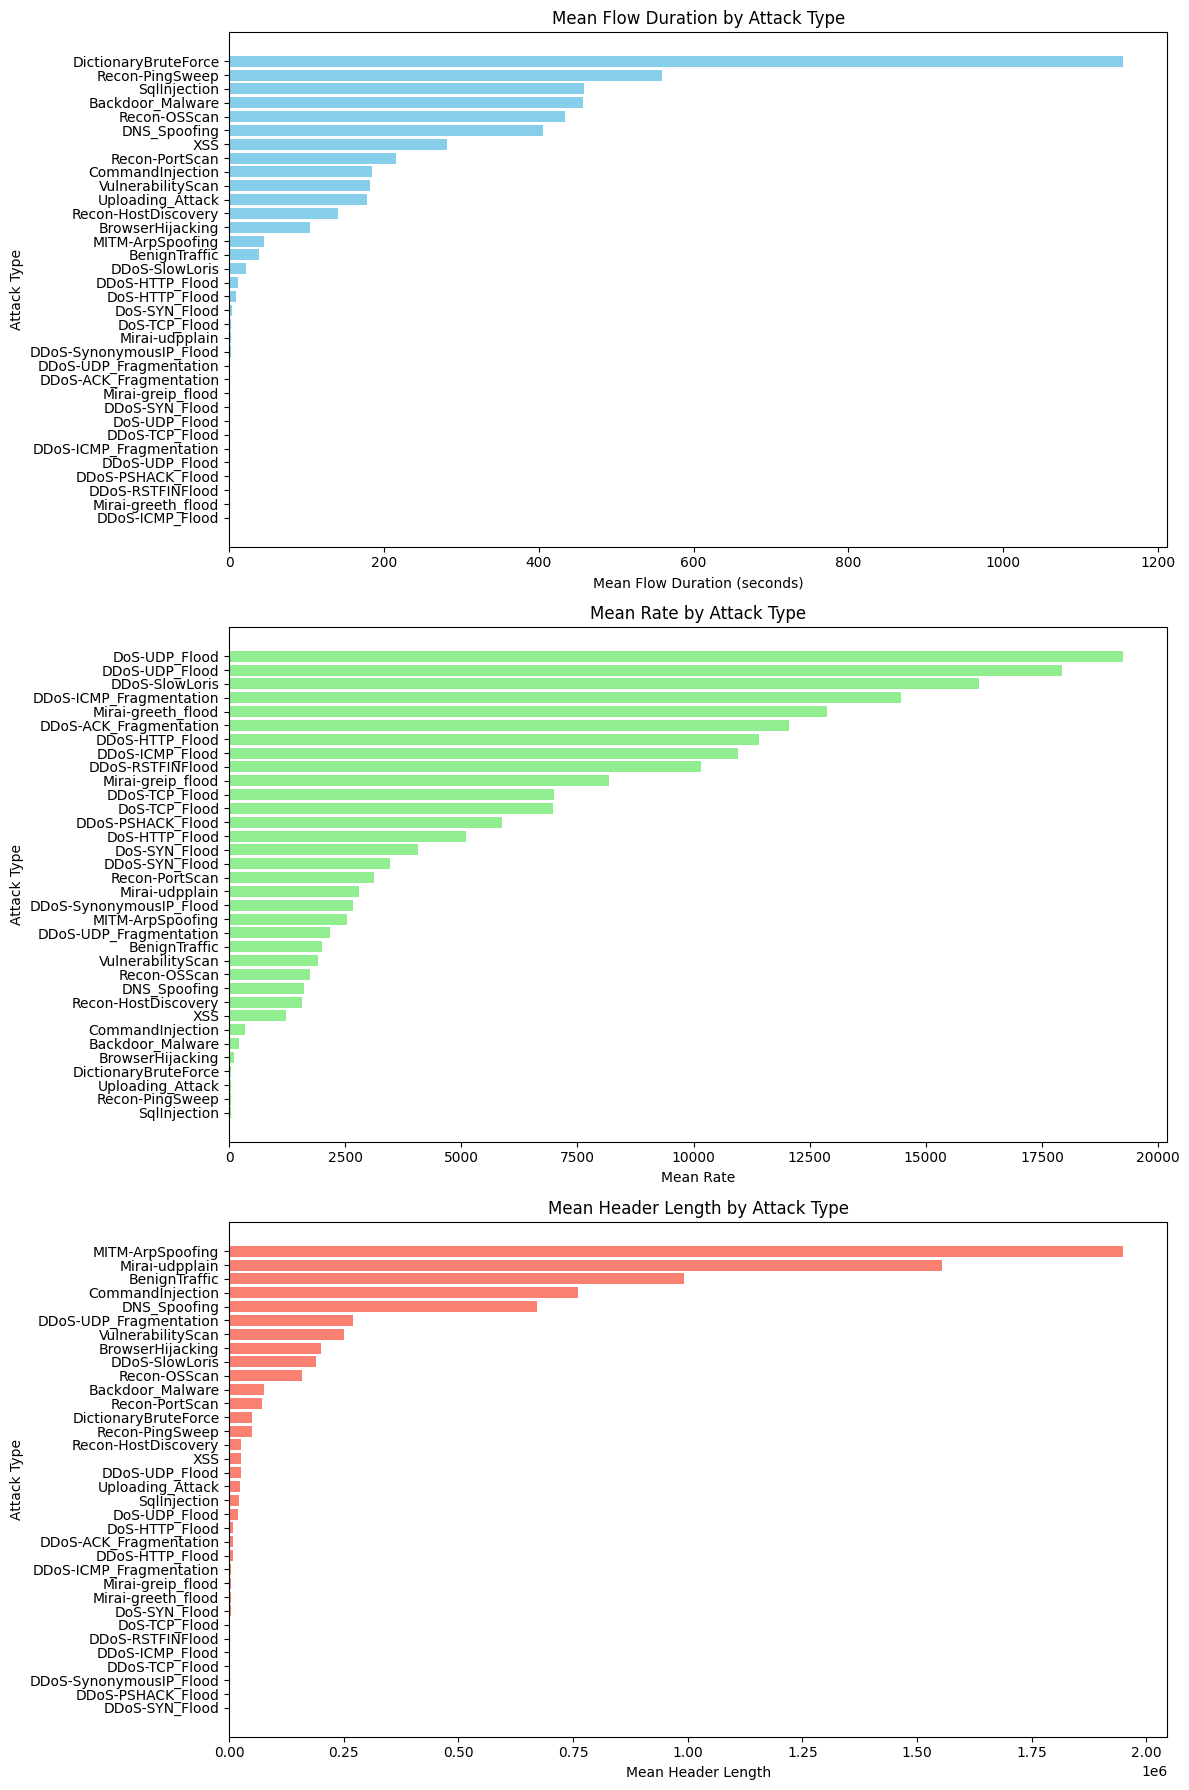

In [14]:
#sorting the DataFrame by 'Rate' and 'Header_Length' in ascending order
mean_values = data.groupby('label')[['flow_duration', 'Rate', 'Header_Length']].mean().sort_values(by='flow_duration', ascending=True)
mean_values_sorted_by_rate = mean_values.sort_values(by='Rate', ascending=True)
mean_values_sorted_by_header_length = mean_values.sort_values(by='Header_Length', ascending=True)

#setting up the figure and axes for plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

#bar chart for mean flow_duration horizontally, h
axes[0].barh(mean_values.index, mean_values['flow_duration'], color='skyblue')
axes[0].set_title('Mean Flow Duration by Attack Type')
axes[0].set_xlabel('Mean Flow Duration (seconds)')
axes[0].set_ylabel('Attack Type')

#bar chart for mean Rate sorted horizontally, h
axes[1].barh(mean_values_sorted_by_rate.index, mean_values_sorted_by_rate['Rate'], color='lightgreen')
axes[1].set_title('Mean Rate by Attack Type')
axes[1].set_xlabel('Mean Rate')
axes[1].set_ylabel('Attack Type')

#bar chart for mean Header_Length horizontally, h
axes[2].barh(mean_values_sorted_by_header_length.index, mean_values_sorted_by_header_length['Header_Length'], color='salmon')
axes[2].set_title('Mean Header Length by Attack Type')
axes[2].set_xlabel('Mean Header Length')
axes[2].set_ylabel('Attack Type')

plt.tight_layout()
plt.show()

#1. The majority of attack types have relatively short mean flow durations. 
    #few types,  dictionary brute force attacks and backdoor malware, that have much longer durations.
    #these attacks may attempt to maintain persistence or conduct their operations more stealthily over extended periods.
#2. Several DDoS attack types show very high mean rates, consistent with their aim to overwhelm the target's capacity. 
    #Other attacks, like DoS-HTTP Flood, show lower rates, possibly because they focus on exploiting specific application vulnerabilities rather than sheer volume.
#3. Most attacks have short mean header lengths. 
    #The longest mean header lengths are observed in DNS spoofing and some DoS attacks. 
    #This could be indicative of the complexities involved in managing the packets for these specific attacks, or it may reflect normal traffic patterns that these attacks mimic.

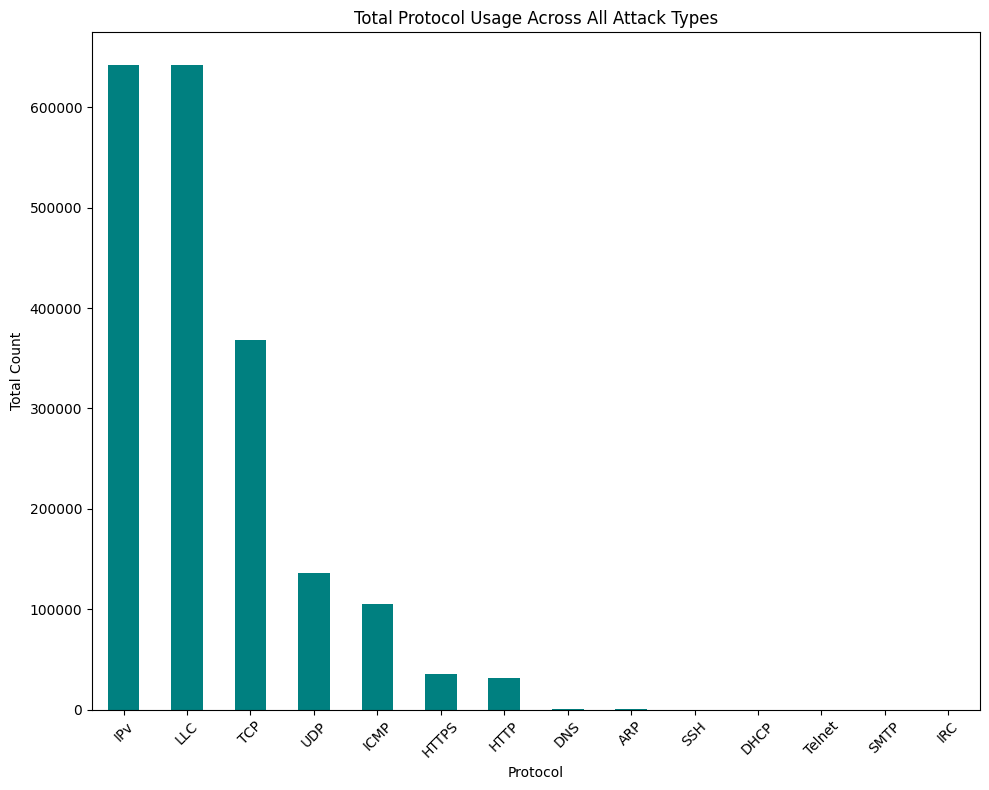

In [15]:
#summing up the occurrences of each protocol across all network attack types
protocol_columns = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
protocol_data = data[protocol_columns].sum().sort_values(ascending=False)

#plotting the protocol usage across all newtork attack types
plt.figure(figsize=(10, 8))
protocol_data.plot(kind='bar', color='teal')
plt.title('Total Protocol Usage Across All Attack Types')
plt.xlabel('Protocol')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#1. IPv and LLC are by far the most common protocols used in the entries of our dataset, 
    #indicating that most network traffic, malicious or otherwise, utilizes these basic networking protocols.
#2. TCP is the next most common protocol showing approx. half of the other 2 attacks.
#3. UDP follows, which is also commonly used in applications where speed is crucial and error correction is either not necessary or performed in the application.
#4. ICMP used for diagnostic or control purposes or generated in response to errors in IP operations, is less common but still significant. 
#5. Other application layer protocols such as HTTPS, HTTP, DNS, and ARP show fewer counts in comparison
    #which could indicate that these protocols are less frequently targeted or utilized by the specific types of network attacks within this dataset.
#To summarize, given that LLC and IPv4 are low-level protocols that would be common across nearly all types of network traffic,
    #high count doesn't provide much insight into the nature of the attacks. 
    #The significant counts for TCP and UDP suggest that these transport layer protocols are often used in the network attacks captured in the dataset
    #possibly because many attacks aim to disrupt services that rely on these protocols.

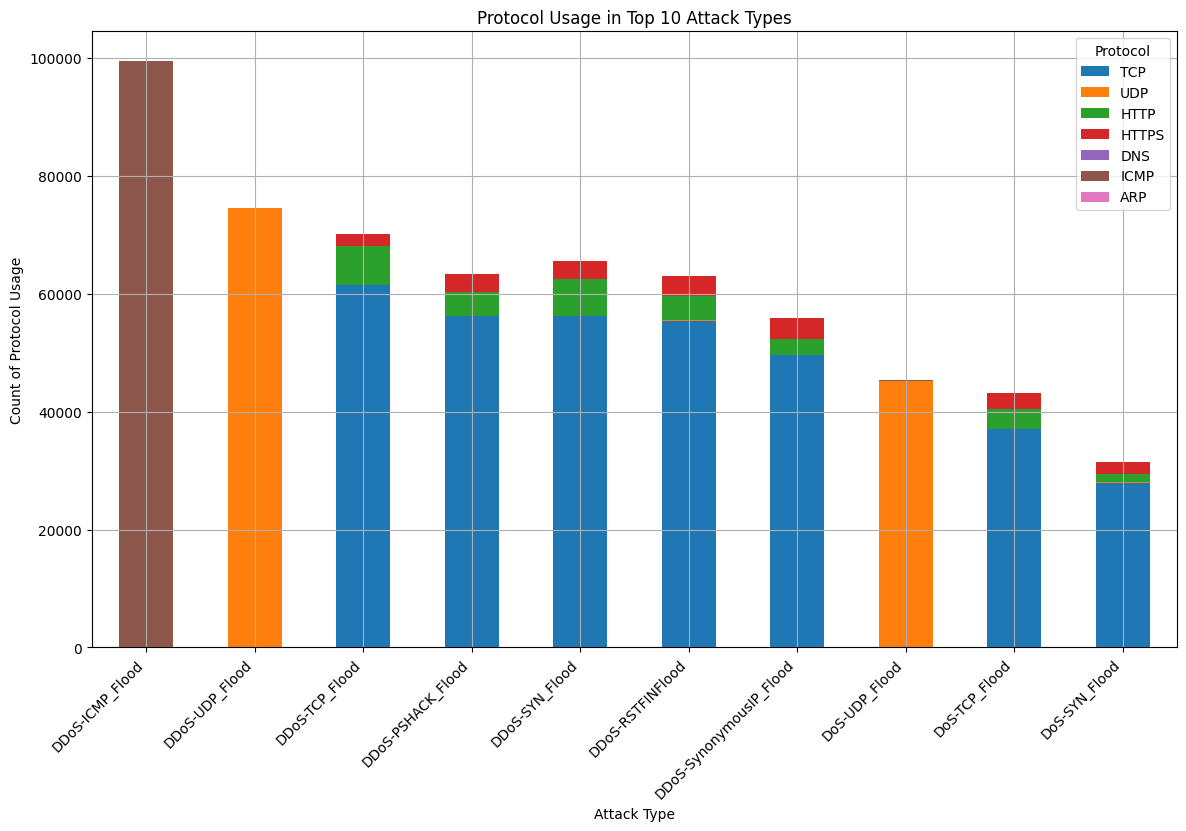

In [16]:
#list of protocols columns to analyze
attack_frequency = data[data['label'] != 'BenignTraffic']['label'].value_counts()
protocols = ['TCP', 'UDP', 'HTTP', 'HTTPS', 'DNS', 'ICMP', 'ARP']

#summing the occurrences of each protocol in the dataset grouped by the attack type
protocol_usage = data.groupby('label')[protocols].sum()

#plotting the protocol usage for the most frequent attack types
top_attack_types = attack_frequency.head(10).index  
top_protocol_usage = protocol_usage.loc[top_attack_types]

#stacked bar plot for protocol usage in top attack types
ax = top_protocol_usage.plot(kind='bar', stacked=True, figsize=(14, 8))
ax.set_title('Protocol Usage in Top 10 Attack Types')
ax.set_xlabel('Attack Type')
ax.set_ylabel('Count of Protocol Usage')
ax.legend(title='Protocol')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#1. TCP is a common protocol across several attack types, 
    #especially in DDoS-SYN Flood and DoS-SYN Flood, which is expected given that SYN Flood attacks exploit the TCP handshake mechanism.
#2. UDP appears frequently used in attacks like DDoS-UDP Flood and DoS-UDP Flood, 
    #which aligns with the nature of these attacks that send a large number of UDP packets to random ports on a remote host.
#3. ICMP is predominantly used in the DDoS-ICMP Flood, as this attack type involves overwhelming the target with ICMP Echo Request (ping) packets.
#4. HTTP and HTTPS show lower usage counts across the board, but they are present, indicating that some of the attacks are targeting web services and applications.
#5. ARP and DNS have very low counts, 
    #which could either suggest they are not commonly exploited in the attacks present in this dataset

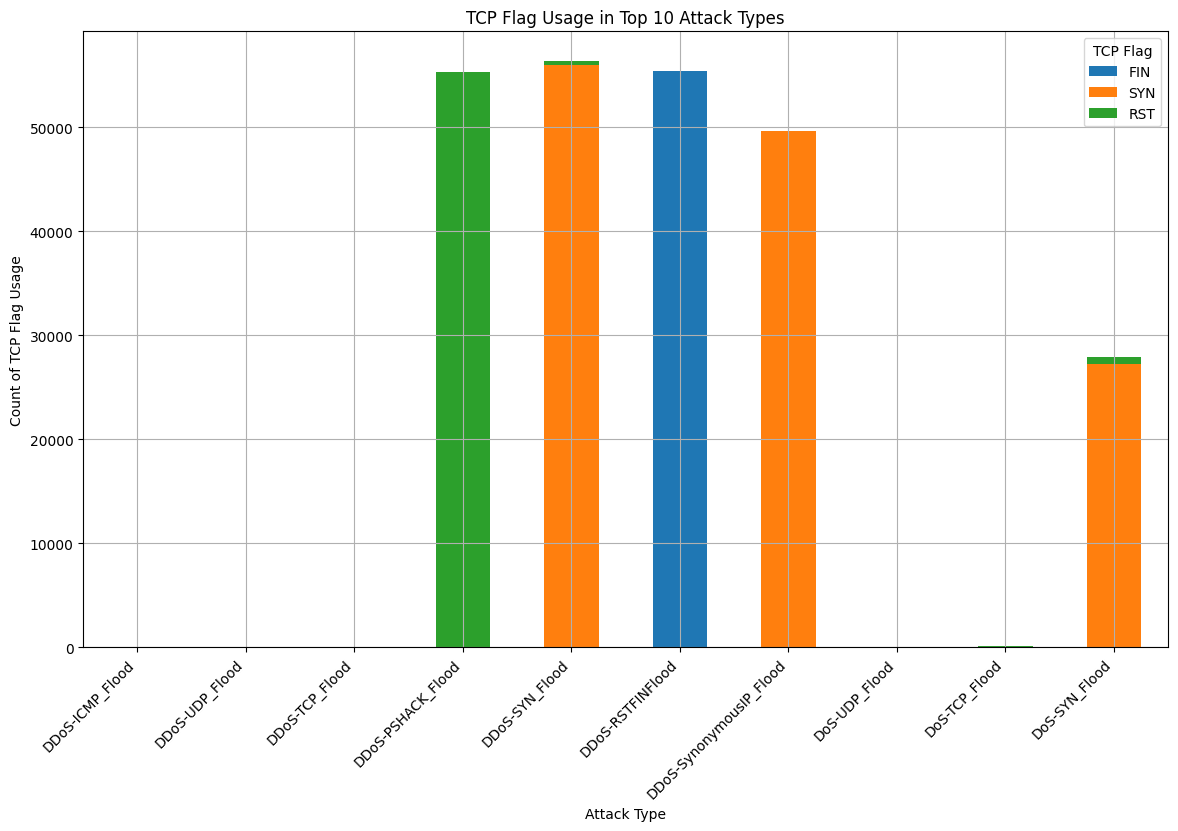

In [17]:
#list of TCP flags columns to analyze
tcp_flags = ['fin_flag_number', 'syn_flag_number', 'ack_flag_number']

#summing occurrences of each TCP flag in the dataset grouped by the attack type
tcp_flag_usage = data.groupby('label')[tcp_flags].sum()
top_tcp_flag_usage = tcp_flag_usage.loc[top_attack_types]

#stacked bar plot for TCP flag usage in top attack types
ax = top_tcp_flag_usage.plot(kind='bar', stacked=True, figsize=(14, 8))
ax.set_title('TCP Flag Usage in Top 10 Attack Types')
ax.set_xlabel('Attack Type')
ax.set_ylabel('Count of TCP Flag Usage')
ax.legend(title='TCP Flag', labels=['FIN', 'SYN', 'RST'])
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#1. SYN Flags: There's a prominent use of SYN flags in several attack types, especially in the SYN Flood attacks (DDoS-SYN Flood and DoS-SYN Flood).
    #which aim to exhaust server resources by initiating a flood of TCP connection requests and not completing the handshake.
#2. FIN Flags: These flags are also used quite heavily, particularly in DDoS attacks. 
    #The presence of FIN flags in high volumes can be indicative of attempts to discreetly close connections or manipulate session states.
#3. RST Flags: The Reset (RST) flag is used significantly less compared to SYN and FIN, but its presence is noted in some attack types, like DoS-TCP Flood. 
    #RST flags are typically sent to terminate an existing connection, so their usage in certain attacks may indicate an attempt to disrupt ongoing communications.
#The data shows that SYN flags are the most dominant across the board, which is characteristic of the types of DDoS and DoS attacks that rely on abusing the TCP handshake process.
    #It can help in the tuning of intrusion detection systems and the creation of filters or rules in firewalls to detect and mitigate such attacks.
    #if a network is experiencing a high volume of SYN flags without corresponding ACKs, it could be indicative of an ongoing SYN Flood attack.

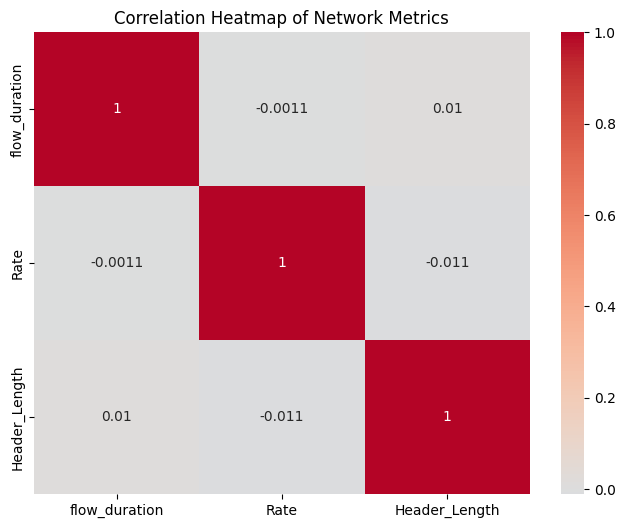

In [18]:
#the correlation matrix 
correlation_matrix = data[['flow_duration', 'Rate', 'Header_Length']].corr()

#generating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Network Metrics')
plt.show()

#no linear correlation between flow_duration, Rate, and Header_Length. 
#the values are very close to zero, suggesting that changes in one metric do not predict changes in the others within this dataset. 
#due to the diverse nature of network traffic, different types of flows (benign and malicious) can have widely varying characteristics.


In [19]:
data['rate_zscore'] = zscore(data['Rate'])

# Filtering out entries that have a z-score greater than 3 or less than -3
anomalies = data[(data['rate_zscore'] > 3) | (data['rate_zscore'] < -3)]

# Investigating the anomalies
# Ensuring full rows are displayed without truncation for investigation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(anomalies[['label', 'flow_duration', 'Rate', 'rate_zscore']])


#The anomaly detection output lists several instances with very high rate values, as indicated by the high z-scores. 
#These anomalies are found across a variety of attack types, especially in DoS-TCP_Flood, DDoS-ICMP_Flood, and DDoS-RSTFINFlood. 
#The presence of extremely high rates with z-scores greater than 20 is quite significant and likely points to aggressive attack behavior aimed at overwhelming targets.
# These outlier values could be symptomatic of the most severe attack attempts, characterized by the intensity and potential to disrupt network services.



                          label  flow_duration        Rate  rate_zscore
22                DoS-TCP_Flood          0.000 2097152.000       20.848
246             DDoS-ICMP_Flood          0.000 2097152.000       20.848
428          Mirai-greeth_flood          0.000  699050.667        6.889
568            DDoS-RSTFINFlood          0.000 2097152.000       20.848
895      DDoS-ACK_Fragmentation          0.000  645277.538        6.352
957              Mirai-udpplain          0.581  336782.450        3.272
1238              DoS-UDP_Flood          0.000  403298.462        3.936
1378            DDoS-ICMP_Flood          0.000 1677721.600       16.660
1442             DDoS-UDP_Flood          0.078  625004.899        6.150
1742           DDoS-RSTFINFlood          0.000  645277.538        6.352
1778             DDoS-UDP_Flood          0.044  312109.951        3.026
1874    DDoS-ICMP_Fragmentation          0.081  524306.520        5.144
1905    DDoS-SynonymousIP_Flood          0.000 1048576.000      

----------------------------------Task performed----------------------------------

1. Understanding the Dataset:

Reviewed the structure and contents of the dataset, focusing on columns related to network traffic and attacks.


2. Network Attack Type Distribution and Statistics:

Identified the frequency of each network attack type.

Summarized key metrics like flow_duration, Rate, and Header_Length for each type of attack.

3. Visualization of Key Metrics by Attack Type:

Created bar charts showing the mean flow duration, rate, and header length for each network attack type.

4. Protocol Analysis:

Generated a bar chart to show the total protocol usage across all attack types.

Produced a stacked bar chart showing the protocol usage within the top 10 attack types in the dataset.

5. TCP Flag Usage Analysis:

Displayed a bar chart illustrating TCP flag usage in the top 10 attack types, focusing on SYN, FIN, and RST flags.

6. Correlation Analysis:

Computed and visualized a heatmap of the correlation matrix for flow_duration, Rate, and Header_Length.

7. Anomaly Detection:

Applied z-score to identify outliers in the Rate metric and extracted rows that were considered anomalous based on their z-scores.

----------------------------------Overall keyfindings----------------------------------

1. Network Attack Types Analysis-

Distribution of Attack Types: The dataset contains a variety of network attacks, with DDoS-ICMP Flood and DDoS-UDP Flood being the most common.

Statistical Summary by Attack Type: Attack types show varying mean flow_duration, Rate, and Header_Length, with flooding attacks showing very short durations and high rates.

2. Visualization of Attack Types-

Flow Duration and Rate: Visualization of flow duration and rate indicated that DDoS and DoS attacks tend to have high rates and short durations.

Header Length: Mean header length across attack types suggested that DDoS attacks often use shorter headers.

3. Protocol Analysis-

Protocol Usage Overview: IPv4 and LLC were the most used protocols across the dataset, with significant use of TCP and UDP in network attacks.

Protocol Usage by Attack Type: Certain protocols like ICMP were primarily used in specific attacks (e.g., DDoS-ICMP Flood), while TCP and UDP were widely used across various attack types.

4. TCP Flag Analysis-

Flag Usage Patterns: The SYN flag was dominant in SYN Flood attacks, FIN flags were present across various DDoS attacks, and RST flags appeared less frequently.


5. Correlation Analysis-

There was virtually no linear correlation between flow_duration, Rate, and Header_Length, suggesting a need for multi-dimensional analysis to understand traffic patterns.

6. Anomaly Detection-

High Rate outliers were detected across various attack types, which could indicate severe attack attempts or be false positives.


----------------------------Machine Learning Model (Based on 70% Training and 30% Testing)----------------------------------

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

#spliting the features and target variable
X = data.drop('label', axis=1)
y = data['label']

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardizing the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#train the classifier
rf.fit(X_train_scaled, y_train)

#geting feature importances from the model
importances = rf.feature_importances_


sorted_indices = np.argsort(importances)[::-1]
n_top_features = int(0.2 * X.shape[1])
top_n_indices = sorted_indices[:n_top_features]

#geting the names of the top features
top_features = X.columns[top_n_indices]

#subset the training and testing data to the top n features
X_train_top_features = X_train_scaled[:, top_n_indices]
X_test_top_features = X_test_scaled[:, top_n_indices]

#training a new Random Forest classifier on the selected features
rf_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top_features.fit(X_train_top_features, y_train)

#making Prediction
y_pred = rf_top_features.predict(X_test_top_features)

#calculating accuracy and the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of model with top {n_top_features} features: {accuracy}")
print(classification_report(y_test, y_pred,zero_division=0))

#the feature importances
feature_importances = pd.DataFrame({
    'Feature': top_features,
    'Importance': importances[top_n_indices]
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


Accuracy of model with top 9 features: 0.9916645486563169
                         precision    recall  f1-score   support

       Backdoor_Malware       0.75      0.18      0.29        17
          BenignTraffic       0.81      0.95      0.87      4495
       BrowserHijacking       0.83      0.22      0.34        23
       CommandInjection       0.44      0.25      0.32        16
 DDoS-ACK_Fragmentation       0.99      1.00      0.99      1176
        DDoS-HTTP_Flood       0.94      0.96      0.95       101
        DDoS-ICMP_Flood       1.00      1.00      1.00     29952
DDoS-ICMP_Fragmentation       1.00      1.00      1.00      1929
      DDoS-PSHACK_Flood       1.00      1.00      1.00     17065
       DDoS-RSTFINFlood       1.00      1.00      1.00     16569
         DDoS-SYN_Flood       1.00      1.00      1.00     16900
         DDoS-SlowLoris       0.90      1.00      0.95        79
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     14809
         DDoS-TCP_Flood       1

Key Insights From the Model:

1. The model is highly accurate at 99.19%, indicating strong predictive capabilities.

2. Strong Performance in Dominant Classes: For large classes like DDoS-ICMP_Flood, DDoS-PSHACK_Flood, and DDoS-TCP_Flood, the model achieves perfect or near-perfect precision, recall, and F1-scores. This indicates that the model has learned these patterns very well, likely due to a sufficient number of training samples.

3. Weak Performance in Minor Classes: Classes such as Uploading_Attack and XSS have a precision and recall of 0, indicating that the model failed to identify any true positives for these classes.

Issues:

1. Class Imbalance: The model's weak performance on minor classes suggests a possible class imbalance. When certain classes have a much smaller number of samples compared to others, the model may not learn to identify them effectively.

2. Insufficient Learning for Minority Classes: The zero precision and recall for classes like Uploading_Attack and XSS hint that the model might not have learned the characteristics of these classes, possibly due to insufficient or non-representative training data for these classes.
3. Possibility of Overfitting: While the high accuracy is desirable, it can sometimes be a sign of overfitting, especially if the model performs exceptionally well on the training data but not as well on unseen data.

Reasons for High Accuracy:

1. Effective Feature Set: The top features contributing to the model’s decisions, such as IAT, syn_count, and Magnitude, appear to be very informative and relevant to the task, leading to high predictive power.

2. Robust Model Choice: The RandomForest algorithm is known for its robustness and ability to handle non-linear relationships, which might contribute to high accuracy.
